# Vocabulary Analysis Workshop

## Stop words

There is a term used in document search for words like "and", "to", and "the" - _stop words_. They are generally words that have a high enough average $\mbox{TF}$ that their low $\mbox{IDF}$ does not balance them out.

NLTK provides us with a list of English words often considered stop words. Removing stop words is not a technique that should always be used, and what is and is not a stop word is dependent on the task at hand.

Let's take a look at NLTK's stop words.

(Stop words [wikipedia](https://en.wikipedia.org/wiki/Stop_words))

In [1]:
from __future__ import division, print_function

%matplotlib inline

import nltk
import pandas as pd
import pickle

from vocab_analysis import *

import answers

In [2]:
jobs_df = pd.read_pickle('./data/lemmatized.pickle')

In [3]:
jobs_df.head()

,description,experience,education,is_hourly,is_part_time,is_supervisor,tokens,stems,lemmas
id,,,,,,,,,
0,THE COMPANY Employer is a midstream service...,5+,none,False,False,True,"[THE, COMPANY, Employer, is, a, midstream, ser...","[the, compani, employ, is, a, midstream, servi...","[the, company, employer, be, a, midstream, ser..."
1,ICR Staffing is now accepting resumes for Indu...,2-5,none,False,False,False,"[ICR, Staffing, is, now, accepting, resumes, f...","[icr, staf, is, now, accept, resum, for, indus...","[icr, staff, be, now, accept, resume, for, ind..."
2,This is a great position for the right person....,none,none,False,True,False,"[This, is, a, great, position, for, the, right...","[this, is, a, great, posit, for, the, right, p...","[this, be, a, great, position, for, the, right..."
3,A large multi-specialty health center is expan...,none,none,False,False,False,"[A, large, multi, -, specialty, health, center...","[a, larg, multi, specialti, health, center, is...","[a, large, multi, specialty, health, center, b..."
4,JOB PURPOSE: The Account Director is respon...,5+,bs-degree-needed,False,False,True,"[JOB, PURPOSE, :, The, Account, Director, is, ...","[job, purpos, the, account, director, is, resp...","[job, purpose, the, account, director, be, res..."


In [4]:
with open('./data/segments.pickle') as fp:
    segments = pickle.load(fp)

In [5]:
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'ain',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'aren',
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'couldn',
 u'd',
 u'did',
 u'didn',
 u'do',
 u'does',
 u'doesn',
 u'doing',
 u'don',
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'hadn',
 u'has',
 u'hasn',
 u'have',
 u'haven',
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'isn',
 u'it',
 u'its',
 u'itself',
 u'just',
 u'll',
 u'm',
 u'ma',
 u'me',
 u'mightn',
 u'more',
 u'most',
 u'mustn',
 u'my',
 u'myself',
 u'needn',
 u'no',
 u'nor',
 u'not',
 u'now',
 u'o',
 u'of',
 u'off',
 u'on',
 u'once',
 u'only',
 u'or',
 u'other',
 u'our',
 u'ours',
 u'ourselves',
 u'out',
 u'over',
 u'own',
 u're',
 u's',
 u'same',
 u'shan',
 u'she',
 u'shoul

Notice that they include tokens like "shouldn" and "t" which only exist due to tokenization.

### Exercise 3: finding new stop words

Let's try and find new words to add to our set of stop words. Keep in mind what the meaning of these words are. Although "manag" and "experi" occur very often, they are still meaningfull. You are looking for words that have high average $\mbox{TF.IDF}$, but seem to lack important meaning.

First we will look at $\mbox{TF.IDF}$ values for NLTK's stop words, and then we will look for new candidates.

Feel free to do this however you like - deciding a threshold for one of our values or manual selection.

In [6]:
lemma_avg_tfidf_df = calculate_avg_tfidf(jobs_df['lemmas'])

In [7]:
lemma_avg_tfidf_df.sort_values('avg_tfidf', ascending=False)

,avg_tfidf,idf,sum_tf
and,14.517180,1.019858,62276
to,7.831714,1.041990,32883
the,7.269307,1.092969,29098
be,5.991668,1.049592,24975
of,5.803011,1.095357,23178
a,5.249067,1.051785,21834
in,4.740807,1.065336,19469
we,3.966381,1.333814,13010
with,3.892478,1.112173,15312
for,3.531403,1.087637,14205


In [8]:
lemma_avg_tfidf_df.describe()

,avg_tfidf,idf,sum_tf
count,18286.000000,18286.000000,18286.000000
mean,0.044114,10.334524,60.675489
std,0.208484,2.364239,731.991259
min,0.002765,1.019858,1.000000
25%,0.002765,9.290019,1.000000
50%,0.005529,11.095727,2.000000
75%,0.019568,12.095397,9.000000
max,14.517180,12.095397,62276.000000


In [9]:
lemma_avg_tfidf_df[lemma_avg_tfidf_df.index.to_series().apply(lambda s: s in stopwords)].describe()

,avg_tfidf,idf,sum_tf
count,118.000000,118.000000,118.000000
mean,1.010923,4.436008,3152.432203
std,1.929050,2.829208,8125.946560
min,0.002765,1.019858,1.000000
25%,0.132100,2.387161,100.250000
50%,0.370985,3.811510,422.500000
75%,0.832138,5.541419,1541.250000
max,14.517180,12.095397,62276.000000


The `lemma_avg_tfidf_df` dataframe contains the candidates for new stop words. Explore it by sorting by the different values, and look at different strata.

In [10]:
cleaned_lemma_avg_tfidf = lemma_avg_tfidf_df[lemma_avg_tfidf_df.index.to_series().apply(lambda s: s not in stopwords)]

In [11]:
cleaned_lemma_avg_tfidf.sort_values('avg_tfidf', ascending=False)

,avg_tfidf,idf,sum_tf
experience,2.650559,1.155460,10036
work,2.456489,1.246045,8625
sale,2.424998,2.253476,4708
customer,1.947650,1.885170,4520
skill,1.942506,1.429274,5946
service,1.931315,1.614349,5234
ability,1.744119,1.703241,4480
must,1.703062,1.541671,4833
business,1.592569,2.034303,3425
client,1.564029,2.313262,2958


In [12]:
cleaned_lemma_avg_tfidf.describe()

,avg_tfidf,idf,sum_tf
count,18168.000000,18168.000000,18168.000000
mean,0.037835,10.372834,40.594727
std,0.116925,2.312342,227.032659
min,0.002765,1.155460,1.000000
25%,0.002765,9.290019,1.000000
50%,0.005529,11.095727,2.000000
75%,0.019111,12.095397,9.000000
max,2.650559,12.095397,10036.000000


In [15]:
# new_stopwords = None

# if new_stopwords is None:
#     raise NotImplementedError("Find additions to the list of stop words")
    
new_stopwords = answers.additional_stopwords # uncomment this, and comment the above lines to skip this exercise

In [16]:
custom_stopwords = stopwords | new_stopwords

In [17]:
def stopword_removal(terms):
    """
    This function removes stop words from a list of terms
    Parameters
    ----------
    terms : list[str]
        a list of terms from which to remove stop words
    Returns
    ----------
    list[str]
        a list of terms with the stop words removed
    """
    return [s for s in terms if s not in custom_stopwords]

In [18]:
jobs_df['cleaned_lemmas'] = jobs_df['lemmas'].apply(stopword_removal)

Let's look at the effects of stop word removal.

generating plot 1 / 11
generating plot 2 / 11
generating plot 3 / 11
generating plot 4 / 11
generating plot 5 / 11
generating plot 6 / 11
generating plot 7 / 11
generating plot 8 / 11
generating plot 9 / 11
generating plot 10 / 11
generating plot 11 / 11

('Number of terms: ', 18155)


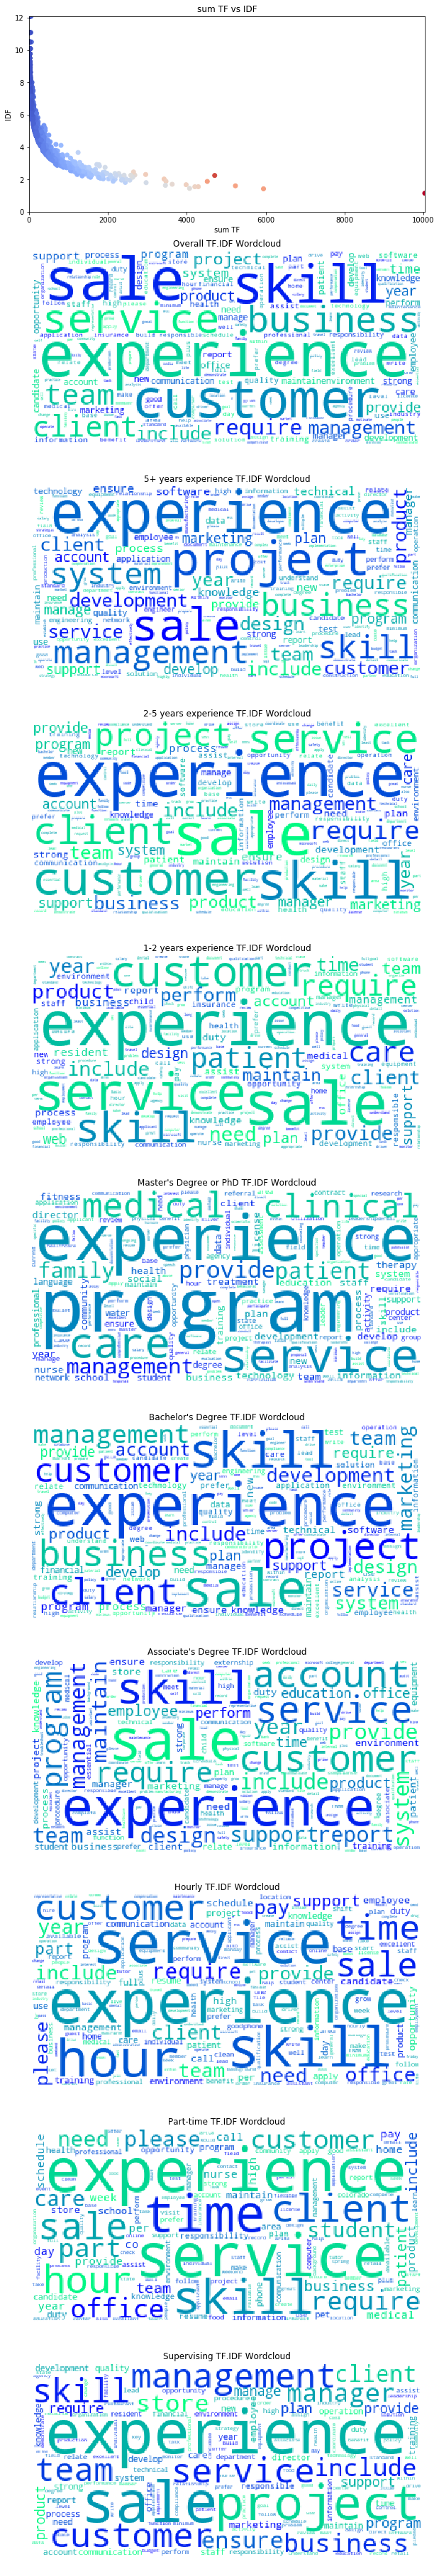

In [19]:
analyze(jobs_df, 'cleaned_lemmas', segments)

In [20]:
save_fun(stopword_removal, custom_stopwords=custom_stopwords)

In [21]:
jobs_df.to_pickle('./data/cleaned.pickle')

**Note**: Again, if you picked stop words that are very different from those in the answers module this analysis may not be applicable.

These terms seems much more meaningful, but we still have a few terms appearing to be dominant - "management", "experience", "sale", "service". These terms are important to the overall context.

1. n-grams: These should be more distinct for different segments since the set of sequences of terms is much larger than the set of terms. The large the value of n the more distinct we can expect complimentary segments to be. The downside is that not all ngrams are meaningful, but these meaningless ngrams are generally not common.

We will be using n-grams.

### NEXT => [6. n-Grams](6. n-Grams.ipynb)